# ..Made by Cristiano dos Anjos..
cristianodosanjos019@gmail.com

## This is a project of analyze of marketing for a supermarket.

Mnt before the name of the product means amount that the costumer spent on such product in the last 2 years. In the column complain, 1 if the customer complained in the last 2 years. Recency means the number of days since the last purchase
+ Our first objective is show graphics with a great information about the purchases in our supermarket.
+ Our second objective is find out some patterns in the purchases.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [2]:
mm2 = pd.read_csv('/home/tyrslayer/Documents/Project-A/marketing_data.csv')
mm2.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US


### Let's get start modeling our dataset.

 Let's check if this data have missing data and drop it out.

In [3]:
mm2.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [4]:
mm2 = mm2.dropna()

In [5]:
mm2.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US


In [6]:
mm2.shape

(2216, 28)

 We have 28 columns of records and informations about 2216 costumers, we need pick up only the columns that we will use.

In [7]:
mm2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [8]:
mm2.columns = ['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country']

In [9]:
mm = mm2[[ 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
        'Response', 'Complain']]

#### Now let's get started make our analyse.

In [10]:
mm.head(2)

,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,Graduation,Divorced,0,0,6/16/14,0,189,104,379,111,189,1,4,4,6,1,1,0
1,Graduation,Single,0,0,6/15/14,0,464,5,64,7,0,1,7,3,7,5,1,0


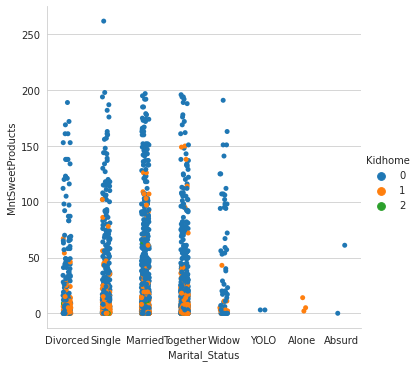

In [11]:
sns.catplot(x='Marital_Status', y='MntSweetProducts', hue='Kidhome', data=mm)
plt.show()

 We can see in the chart above, the majority of our customers who are buying sweets are those who have no children at home, and in proportion, people married are purchasing many more.

Using a method that shows us the correlations of the columns will give us a clearer view.

In [12]:
mm.corr()

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
Kidhome,1.000000,-0.039869,0.011492,-0.497336,-0.373396,-0.439261,-0.388884,-0.378026,0.216913,-0.371977,-0.504501,-0.501349,0.447477,-0.077909,0.040978
Teenhome,-0.039869,1.000000,0.013838,0.003747,-0.176558,-0.261122,-0.205242,-0.163056,0.386246,0.162077,-0.112692,0.049737,0.131240,-0.153901,0.003307
Recency,0.011492,0.013838,1.000000,0.015721,-0.005844,0.022518,0.000551,0.025110,0.002115,-0.005641,0.024081,-0.000434,-0.018564,-0.199766,0.013637
MntWines,-0.497336,0.003747,0.015721,1.000000,0.387024,0.568860,0.397721,0.390326,0.008886,0.553786,0.634753,0.640012,-0.321978,0.246299,-0.039470
MntFruits,-0.373396,-0.176558,-0.005844,0.387024,1.000000,0.547822,0.593431,0.571606,-0.134512,0.302039,0.486263,0.458491,-0.418729,0.122443,-0.005324
MntMeatProducts,-0.439261,-0.261122,0.022518,0.568860,0.547822,1.000000,0.573574,0.535136,-0.121308,0.307090,0.734127,0.486006,-0.539484,0.237746,-0.023782
MntFishProducts,-0.388884,-0.205242,0.000551,0.397721,0.593431,0.573574,1.000000,0.583867,-0.143241,0.299688,0.532757,0.457745,-0.446423,0.108145,-0.021220
MntSweetProducts,-0.378026,-0.163056,0.025110,0.390326,0.571606,0.535136,0.583867,1.000000,-0.121432,0.333937,0.495136,0.455225,-0.422371,0.116170,-0.022641
NumDealsPurchases,0.216913,0.386246,0.002115,0.008886,-0.134512,-0.121308,-0.143241,-0.121432,1.000000,0.241440,-0.012118,0.066107,0.346048,0.003451,0.000497
NumWebPurchases,-0.371977,0.162077,-0.005641,0.553786,0.302039,0.307090,0.299688,0.333937,0.241440,1.000000,0.386868,0.516240,-0.051226,0.151431,-0.016642


<Figure size 1008x504 with 0 Axes>

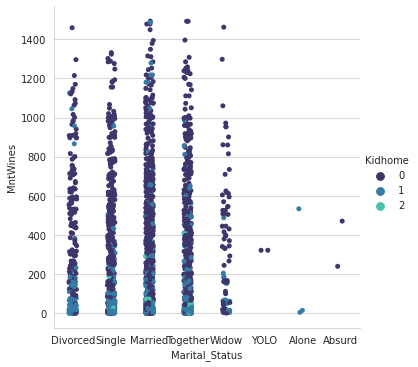

In [13]:
plt.figure(figsize=(14,7))
sns.catplot(x='Marital_Status', y='MntWines', hue='Kidhome', data=mm, palette = sns.color_palette('mako', 3))
plt.show()

Looking at the table that the corr() method showed us, we found out that between the column Kidhome and MntWines has a negative correlation, and with the graph above we can see that the more children each customer has living with him, the less wine he will buy.

<Figure size 1224x432 with 0 Axes>

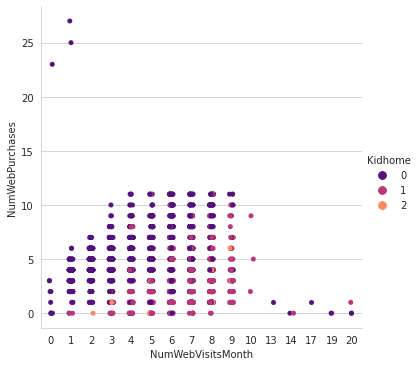

In [14]:
plt.figure(figsize=(17,6))
sns.catplot(x='NumWebVisitsMonth', y='NumWebPurchases', hue='Kidhome', data=mm, palette = sns.color_palette('magma', 3))
plt.show()

With the graph above we can see that who spend more money in our website is the customers without children living with, they is who buy more often too.

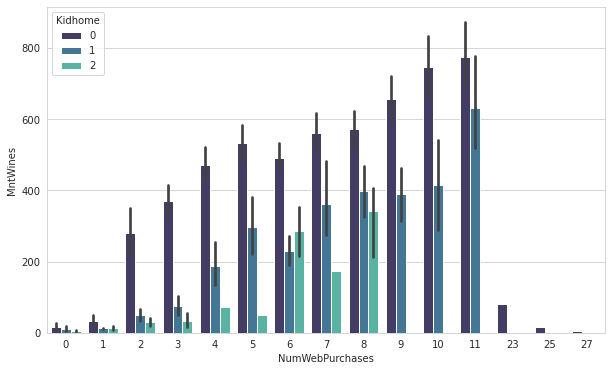

In [15]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette('mako', 3)
ax = sns.barplot(x='NumWebPurchases', y='MntWines', hue ='Kidhome', data=mm, palette = palette)

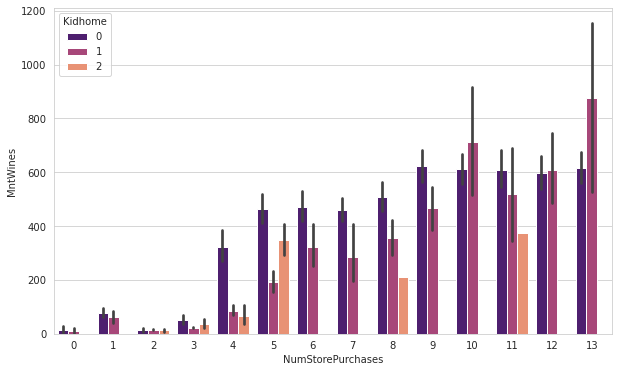

In [16]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette('magma', 3)
ax = sns.barplot(x='NumStorePurchases', y='MntWines', hue ='Kidhome', data=mm, palette = palette)

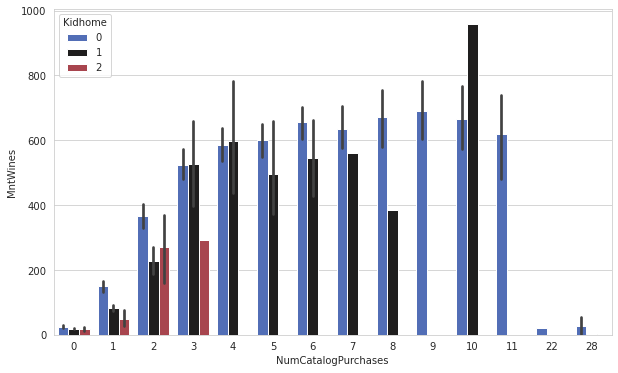

In [17]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette('icefire', 3)
ax = sns.barplot(x='NumCatalogPurchases', y='MntWines', hue ='Kidhome', data=mm, palette = palette)

Comparing the three graphs above we found out that our customers with children at home buy more in our store and catalog than at our website, and now we also know the our customers with children buy many more at our store than our catalog.

##### Now let's search about the difference between purchases of meat and wine at our website, catalog and store.

In [18]:
mm.tail(3)

,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2237,Graduation,Divorced,1,0,12/3/12,99,185,2,88,15,5,2,6,1,5,8,0,0
2238,Graduation,Married,0,0,11/29/12,99,267,38,701,149,165,1,5,4,10,3,0,0
2239,PhD,Married,0,2,9/1/12,99,169,24,553,188,0,1,8,5,4,7,1,0


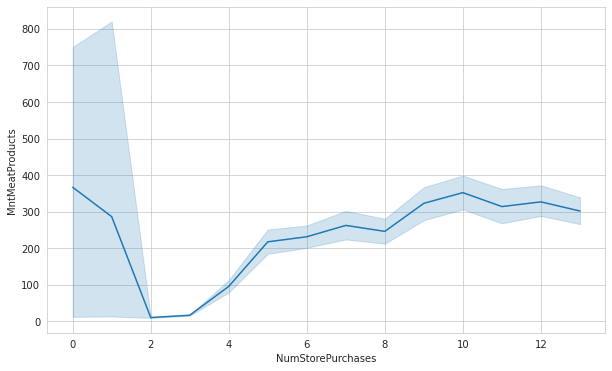

In [19]:
plt.figure(figsize=(10,6))
sns.lineplot(x='NumStorePurchases', y='MntMeatProducts', data=mm, palette = sns.color_palette('magma', 3))
plt.show()

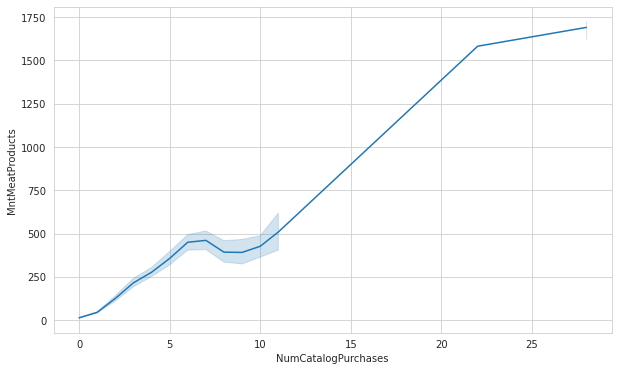

In [20]:
plt.figure(figsize=(10,6))
sns.lineplot(x='NumCatalogPurchases', y='MntMeatProducts', data=mm, palette=sns.color_palette('magma', 3))
plt.show()

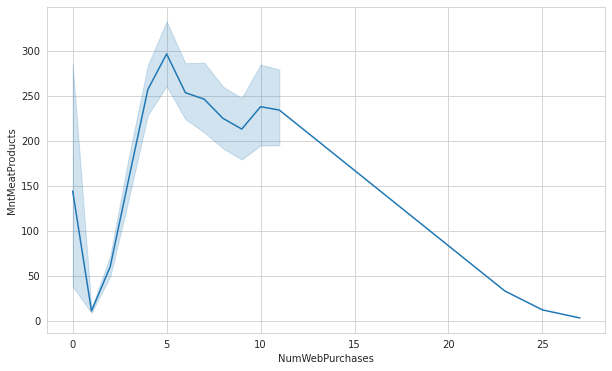

In [21]:
plt.figure(figsize=(10,6))
sns.lineplot(x='NumWebPurchases', y='MntMeatProducts', data=mm, palette=sns.color_palette('magma', 2))
plt.show()

With the graphics above we are knowing that in the catalog ours customers are buying many more meat, the secund graph that is showing us the records of catalog has great positive linear correlation.

## Thanks for researching with me :)